In [ ]:
# Problema de Negócio
# Diabetes em Mulheres

In [1]:
# Importação das Bibliotecas
from pandas import read_csv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')




In [2]:
# Carregando os Dados
arquivo = 'diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# análise Exploratória

In [4]:
# Missing
dados.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
# Descritiva
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


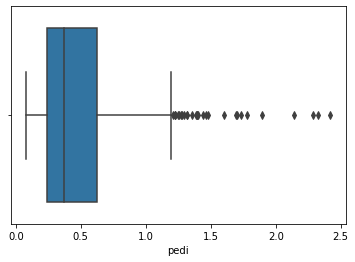

In [6]:
# Gráfico da Variável
sns.boxplot(dados.pedi)

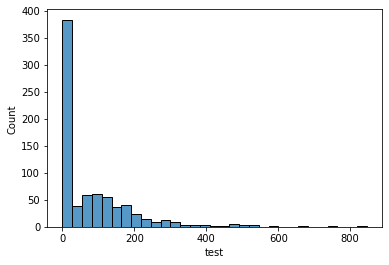

In [7]:
dados.describe()
sns.histplot(dados.test)

In [8]:
dados.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# 3 Pré-Processamento dos Dados
# Separando o array em camponentes de input e output
X = array[:,0:8]
Y = array[:,8]

In [ ]:
X

In [ ]:
Y

In [15]:
# Normalização
# Gerando a nova escala(normalizando os dados)
scaler = MinMaxScaler(feature_range= (0,1))
rescaledX = scaler.fit_transform(X)

In [16]:
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [23]:
# Padronização
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [24]:
standardX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [28]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7


In [29]:
# Separando os dados em folds
kfold = KFold(num_folds, True, random_state= seed)


In [30]:
#  Criação da Máquina Preditiva
# Criando Modelo
modelo = LogisticRegression()


In [ ]:
# Validação
resultado = cross_val_score(modelo, X, Y, cv = kfold)

In [21]:
# Validação
resultado = cross_val_score(modelo, rescaledX, Y, cv = kfold)

In [ ]:
# 5 Avaliação da Máquina Preditiva
# print o resultado
print("Acurácia: %.3f" %(resultado.mean()* 100))

# Acurácia:              77.734
# Normalização Acurácia: 77.479
# Padronização Acurácia: 77.479

Acurácia: 77.734


In [22]:
# 5 Avaliação da Máquina Preditiva
# print o resultado da Normalização
print("Acurácia: %.3f" %(resultado.mean()* 100))

# Acurácia: 77.479

Acurácia: 77.479


In [31]:
# 5 Avaliação da Máquina Preditiva
# print o resultado da Padronização
print("Acurácia: %.3f" %(resultado.mean()* 100))
# Acurácia: 77.479

Acurácia: 77.479


In [33]:
# Comparação com XGBoost
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 


In [36]:
# Carregando os Dados
arquivo = 'diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values


In [ ]:
# 2 Análise Exploratória

In [46]:
# 3° Pré-Processamento
# Separando o array em componetes de input e output
X = array[:, 0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de test
teste_size= 0.33
seed= 7

# criando o dataset treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)


In [47]:
# 4° Criação da Máquina Preditiva
# Criando o módelo
model = XGBClassifier()

In [48]:
# Treinando o Módelo
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Fazendo Previsões
y_pred = modelo.predict(X_teste)
previsões = [round(value) for value in y_pred] 

In [51]:
# 5° Avaliação da Máquina Preditiva
# Avaliando as Previsões
accuracy = accuracy_score(y_teste, previsões)
print("Acurácia: %.2f" % (accuracy * 100.0))

Acurácia: 78.74
